In [61]:
!pip install contractions

In [62]:
!pip install memory-profiler

In [63]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [65]:
file_path = "/content/IMDB Dataset_just_positive_negative_col.csv"

In [66]:
imdb = pd.read_csv(file_path)

In [67]:
imdb
print(type(imdb))

<class 'pandas.core.frame.DataFrame'>


In [68]:
data = imdb.loc[0:30, ('review', 'sentiment')]
print(data)

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three pris

In [69]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [70]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [71]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

# Data **preprocessing**

In [72]:
data['review'] = data['review'].str.lower()

# **Removing HTML Tags**
Import re: This line imports the re module, which provides functionalities for working with regular expressions in Python.

# . matches any character
(except for line terminators)

In [73]:
import re
def remove_html(text):
  pattern = re.compile('<.*>')
  return pattern.sub(r'', text)
data['review'] = data['review'].apply(remove_html)

# Removing URLs

# pattern = re.compile(r'https?://\S+|www\.\S+'):p
\
This line creates a regular expression pattern using re.compile. The actual pattern is:


r'': Raw string prefix to avoid interpreting backslashes as escape characters.


https?://: Matches either "http://" or "https://" at the beginning of the URL.
\S+: Matches one or more non-whitespace characters (the actual content of the URL).


|: OR operator, separates two alternative patterns.


www\.: Matches "www." at the beginning of the URL.


\S+: Matches one or more non-whitespace characters (the actual content of the URL).

In [74]:
def remove_url(text):
  pattern = re.compile(r'https?://\S+')
  return pattern.sub(r'',text)

data['review'] = data['review'].apply(remove_url)

In [75]:
print(data.head(10))

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. the realism rea...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive
5  probably my all-time favorite movie, a story o...  positive
6  i sure would like to see a resurrection of a u...  positive
7  this show was an amazing, fresh & innovative i...  negative
8  encouraged by the positive comments about this...  negative
9  if you like original gut wrenching laughter yo...  positive


# Remove alphanumeric

In [76]:
# Remove non-alphanumeric characters and convert to lowercase
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
  return text

data['review'] = data['review'].apply(preprocess_text)


# Remove Punctuations

In [77]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def remove_punctuation(text):
  exclude = set(string.punctuation)
  return ''.join(char for char in text if char not in exclude)
data['review'] = data['review'].apply(remove_punctuation)


In [79]:
print(data.head(10))

                                              review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production the realism real...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically theres a family where a little boy j...  negative
4  petter matteis love in the time of money is a ...  positive
5  probably my alltime favorite movie a story of ...  positive
6  i sure would like to see a resurrection of a u...  positive
7  this show was an amazing fresh  innovative ide...  negative
8  encouraged by the positive comments about this...  negative
9  if you like original gut wrenching laughter yo...  positive


In [80]:
# Define a mapping dictionary
sentiment_mapping = {'negative':0, 'positive':1}

# Map the 'sentiment' column using the mapping dictionary
data['sentiment'] = data['sentiment'].map(sentiment_mapping)

In [81]:
print(data.head(30))

                                               review  sentiment
0   one of the other reviewers has mentioned that ...          1
1   a wonderful little production the realism real...          1
2   i thought this was a wonderful way to spend ti...          1
3   basically theres a family where a little boy j...          0
4   petter matteis love in the time of money is a ...          1
5   probably my alltime favorite movie a story of ...          1
6   i sure would like to see a resurrection of a u...          1
7   this show was an amazing fresh  innovative ide...          0
8   encouraged by the positive comments about this...          0
9   if you like original gut wrenching laughter yo...          1
10  phil the alien is one of those quirky films wh...          0
11  i saw this movie when i was about 12 when it c...          0
12  so im not a big fan of bolls work but then aga...          0
13  the cast played shakespearei have no more to w...          0
14  this a fantastic movi

# Word clouds
 are created for a few key reasons in the context of text analysis, particularly sentiment analysis:

1. Visualization of Word Frequencies:

Word clouds provide a visually appealing way to represent the frequency of words in a text corpus. Words that appear more frequently are displayed in larger fonts, creating a clear picture of the most prominent terms. This helps identify the dominant themes, topics, or vocabulary associated with the text data.
2. Identifying Key Concepts:

By focusing on the larger words, you can quickly grasp the key concepts discussed in the text. This is especially useful for summarizing large amounts of text data or identifying the main topics of discussion.
3. Sentiment Analysis Insights:

In sentiment analysis, word clouds can reveal the emotional tone of the text data. For instance, a positive sentiment word cloud might be dominated by words like "happy," "love," or "great," while a negative sentiment word cloud might show words like "sad," "angry," or "terrible."
4. Engagement and Communication:

Word clouds can be a more engaging way to present text analysis results compared to raw data tables or lists. They can be used in reports, presentations, or even social media to capture attention and communicate insights in a visually compelling way.
5. Identifying Trends or Differences:

If you create word clouds for different categories of text data (e.g., positive vs. negative reviews, product reviews from different brands), you can compare them to identify trends or differences in word usage. This can reveal valuable insights into user preferences, product reception, or sentiment variations across different groups.
However, it's important to consider some limitations of word clouds:

Order Doesn't Matter: Word clouds don't show the order in which words appear, which can be crucial for understanding the meaning of a sentence.
Frequency Doesn't Equal Importance: Not all frequent words are equally important. Consider using stop word removal or weighting techniques to better reflect the semantic significance of words.
Limited Context: Without additional context, word clouds might not provide a complete picture of the text's meaning.

(-0.5, 799.5, 799.5, -0.5)

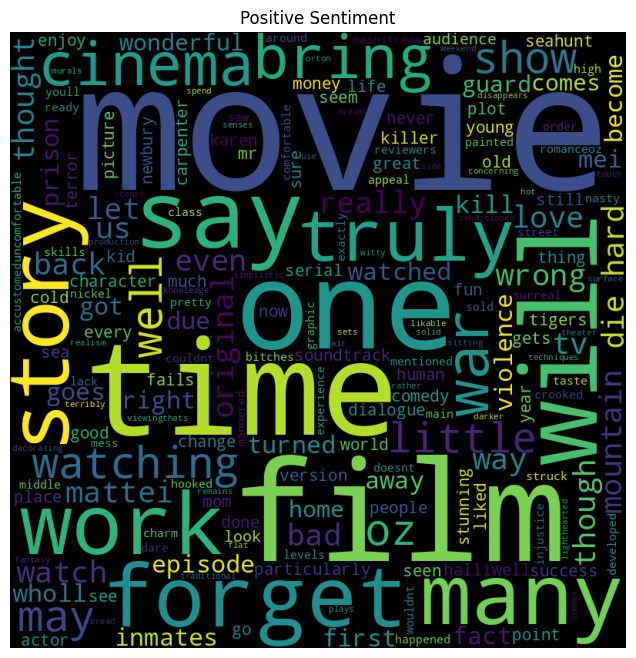

In [82]:
stopwords = set(STOPWORDS)
sentences = data['review']
from matplotlib import pyplot as plt
positive = ' '.join(map(str, sentences[data['sentiment'] == 1]))
negative = ' '.join(map(str, sentences[data['sentiment']== 0]))

wordcloud1 = WordCloud(width = 800, height = 800,
                      background_color ='black',
                      stopwords = stopwords,
                      min_font_size = 10).generate(positive)


plt.figure(figsize=(10,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

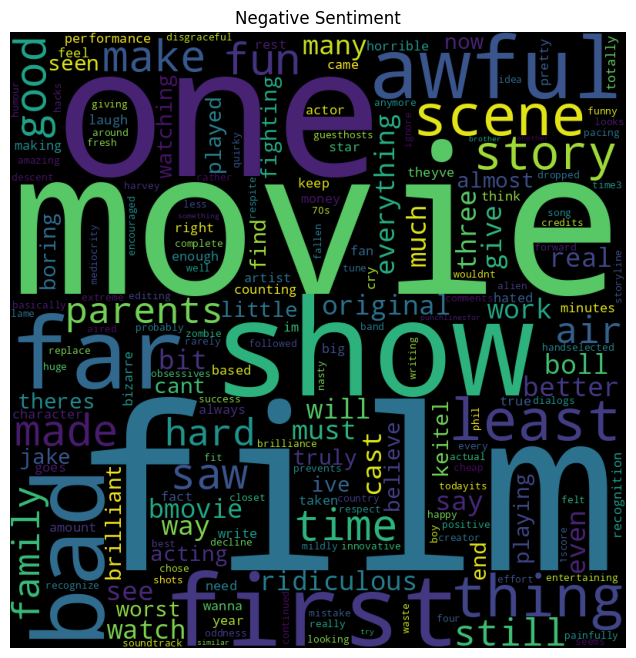

In [83]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(negative)

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()

# [check spelling](https://)
too much slow

In [84]:
'''def batch_spelling_correction(texts):
    corrected_texts = []
    for text in texts:
        textblob = TextBlob(text)
        corrected_text = textblob.correct().string
        corrected_texts.append(corrected_text)
    return corrected_texts

def parallel_spelling_correction(texts, n_jobs=-1, batch_size=1000):
    # Split the texts into batches
    text_batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

    # Apply spelling correction to each batch in parallel
    corrected_batches = Parallel(n_jobs=n_jobs)(
        delayed(batch_spelling_correction)(batch) for batch in text_batches
    )

    # Flatten the list of corrected batches
    corrected_texts = [text for batch in corrected_batches for text in batch]

    return corrected_texts

# Define the number of parallel jobs
n_jobs = -1  # Use all available CPU cores

# Apply parallel spelling correction to the 'review' column of the IMDb dataset
imdb['review'] = parallel_spelling_correction(imdb['review'], n_jobs=n_jobs)'''

"def batch_spelling_correction(texts):\n    corrected_texts = []\n    for text in texts:\n        textblob = TextBlob(text)\n        corrected_text = textblob.correct().string\n        corrected_texts.append(corrected_text)\n    return corrected_texts\n\ndef parallel_spelling_correction(texts, n_jobs=-1, batch_size=1000):\n    # Split the texts into batches\n    text_batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]\n\n    # Apply spelling correction to each batch in parallel\n    corrected_batches = Parallel(n_jobs=n_jobs)(\n        delayed(batch_spelling_correction)(batch) for batch in text_batches\n    )\n\n    # Flatten the list of corrected batches\n    corrected_texts = [text for batch in corrected_batches for text in batch]\n\n    return corrected_texts\n\n# Define the number of parallel jobs\nn_jobs = -1  # Use all available CPU cores\n\n# Apply parallel spelling correction to the 'review' column of the IMDb dataset\nimdb['review'] = parallel_spelling_

# Removing contractions

In [85]:
def expand_contractions(text):
  expanded_text = contractions.fix(text)
  return expanded_text

data['review'] = data['review'].apply (expand_contractions)

# Tokenize the text

In [86]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
def do_tokenization(text):
  token_words = word_tokenize(text)
  return token_words
data['review'] = data['review'].str.join('')
print(data['review'])
data['review']  = data['review'].apply(do_tokenization)


0     one of the other reviewers has mentioned that ...
1     a wonderful little production the realism real...
2     i thought this was a wonderful way to spend ti...
3     basically there is a family where a little boy...
4     petter matteis love in the time of money is a ...
5     probably my alltime favorite movie a story of ...
6     i sure would like to see a resurrection of a u...
7     this show was an amazing fresh  innovative ide...
8     encouraged by the positive comments about this...
9     if you like original gut wrenching laughter yo...
10    phil the alien is one of those quirky films wh...
11    i saw this movie when i was about 12 when it c...
12    so i am not a big fan of bolls work but then a...
13    the cast played shakespearei have no more to w...
14    this a fantastic movie of three prisoners who ...
15    kind of drawn in by the erotic scenes only to ...
16    some films just simply should not be remade th...
17    this movie made it into one of my top 10 m

In [88]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [90]:
print(data['review'])

0     [one, of, the, other, reviewers, has, mentione...
1     [a, wonderful, little, production, the, realis...
2     [i, thought, this, was, a, wonderful, way, to,...
3     [basically, there, is, a, family, where, a, li...
4     [petter, matteis, love, in, the, time, of, mon...
5     [probably, my, alltime, favorite, movie, a, st...
6     [i, sure, would, like, to, see, a, resurrectio...
7     [this, show, was, an, amazing, fresh, innovati...
8     [encouraged, by, the, positive, comments, abou...
9     [if, you, like, original, gut, wrenching, laug...
10    [phil, the, alien, is, one, of, those, quirky,...
11    [i, saw, this, movie, when, i, was, about, 12,...
12    [so, i, am, not, a, big, fan, of, bolls, work,...
13    [the, cast, played, shakespearei, have, no, mo...
14    [this, a, fantastic, movie, of, three, prisone...
15    [kind, of, drawn, in, by, the, erotic, scenes,...
16    [some, films, just, simply, should, not, be, r...
17    [this, movie, made, it, into, one, of, my,

Removing Stop Words

In [91]:

# Function to remove stop words
def remove_stopwords(text):
  filtered_words = [word for word in text if word.lower() not in stop_words]
  return ' '.join(filtered_words)

data['review'] = data['review'].apply(remove_stopwords)



In [92]:
data.head(20)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production realism really com...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1
6,sure would like see resurrection dated seahunt...,1
7,show amazing fresh innovative idea 70s first a...,0
8,encouraged positive comments film looking forw...,0
9,like original gut wrenching laughter like movi...,1


# Removing the numeric value

In [93]:
data['review'] = data.review.str.replace(r'\d+', r'', regex=True)

In [94]:
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

In [95]:
def do_stemming(token_words):
    ps = PorterStemmer()
    words = token_words.split()
    return [ps.stem(word) for word in words]
data['review'] = data['review'].apply(do_stemming)

In [96]:
data.head(30)

,review,sentiment
0,"[one, review, mention, watch, oz, episod, hook...",1
1,"[wonder, littl, product, realism, realli, come...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1
5,"[probabl, alltim, favorit, movi, stori, selfle...",1
6,"[sure, would, like, see, resurrect, date, seah...",1
7,"[show, amaz, fresh, innov, idea, s, first, air...",0
8,"[encourag, posit, comment, film, look, forward...",0
9,"[like, origin, gut, wrench, laughter, like, mo...",1


# Train Test Split

In [97]:
review = data['review']
sentiment = data['sentiment']

In [98]:
x_train_review, x_test_review, y_train_sentiment, y_test_sentiment=train_test_split(review,sentiment,test_size=0.2,random_state=42)
print("Testing Set shape:", x_train_review.shape, y_train_sentiment.shape)

Testing Set shape: (24,) (24,)
